<a href="https://colab.research.google.com/github/vanessaleija2025-png/LEIJA-CARDENAS-FATIMA-VANESSA---IVAN-SANCHEZ-FLORES-/blob/main/VANESSALEIJA_GABRIELAALVARADO_MISSAEL_RAMIREZ_IVAN_SANCHEZ_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("datasets/car_price_prediction_.csv")
data.head()
data.shape

(2500, 10)

In [15]:

data['Price_per_Mileage'] = (data['Price'] / data['Mileage']).round(4)

condition_analysis = data.groupby('Condition').agg({
    'Price': ['mean', 'median'],
    'Mileage': ['mean', 'median'],
    'Engine Size': 'mean',
    'Year': 'mean'
}).reset_index()

print(condition_analysis)


  Condition         Price                  Mileage           Engine Size  \
                     mean    median           mean    median        mean   
0  Like New  53518.746376  55069.13  151986.429426  155719.0    3.458373   
1       New  51904.509951  52264.40  148667.967862  141056.0    3.437824   
2      Used  52470.919076  52840.27  148586.632749  150943.0    3.497895   

          Year  
          mean  
0  2011.427033  
1  2011.911001  
2  2011.553216  


In [16]:
# Calcular columna equivalente a Likes_to_Views
data['Price_per_Mileage'] = (data['Price'] / data['Mileage']).round(4)

# Filtrar autos con Price_per_Mileage bajo
low_value_cars = data[data['Price_per_Mileage'] < 0.01]

# Agrupar por Condition (equivalente a Album_type)
low_value_summary = low_value_cars.groupby('Condition').size().reset_index(name='count')

low_value_summary.head()


,Condition,count


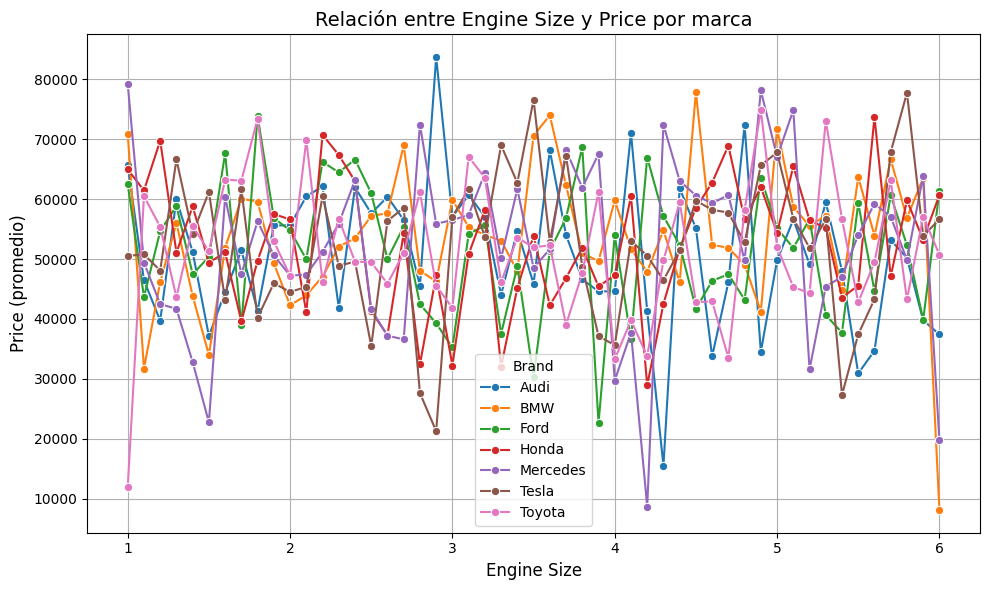

In [21]:


# Crear conjunto para la relación entre Engine Size y Price (ejemplo similar a low_likes)
trend_data = df.groupby(['Brand', 'Engine Size']).agg({'Price': 'mean'}).reset_index()

# Personalizar el gráfico
plt.figure(figsize=(10,6))
sns.lineplot(data=trend_data, x='Engine Size', y='Price', hue='Brand', marker='o')

plt.title('Relación entre Engine Size y Price por marca', fontsize=14)
plt.xlabel('Engine Size', fontsize=12)
plt.ylabel('Price (promedio)', fontsize=12)
plt.legend(title='Brand')
plt.grid(True)
plt.tight_layout()

plt.show()

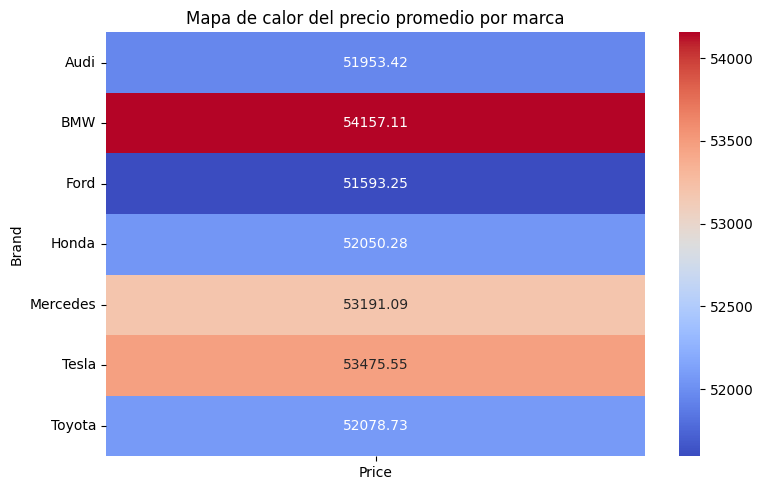

In [19]:
# Heatmap del promedio de Price por Brand
heatmap_data = df.groupby('Brand', as_index=False)['Price'].mean().set_index('Brand')

plt.figure(figsize=(8,5))
plt.title('Mapa de calor del precio promedio por marca')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.tight_layout()
plt.show()


    Brand        Price
0  Toyota  19477444.36
1     BMW  19388246.95
2    Audi  19118860.33


/tmp/ipython-input-1140050820.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_brands, x='Brand', y='Price', palette='viridis')


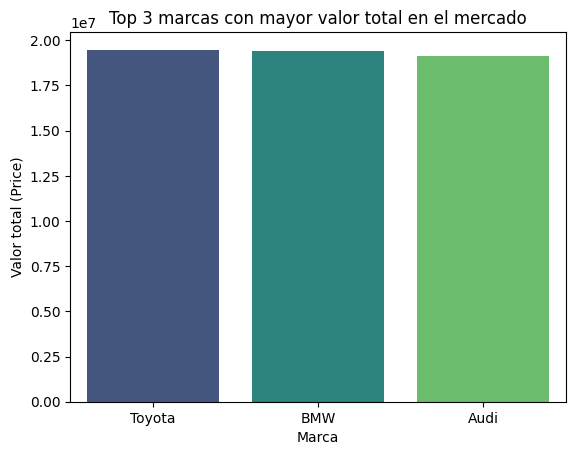

In [20]:
# Identificar las tres marcas con mayor total de "Price"
top_brands = df.groupby('Brand')['Price'].sum().sort_values(ascending=False).reset_index().head(3)

# Personalizar el gráfico
plt.title('Top 3 marcas con mayor valor total en el mercado')
plt.xlabel('Marca')
plt.ylabel('Valor total (Price)')

# Crear gráfico de barras
sns.barplot(data=top_brands, x='Brand', y='Price', palette='viridis')

# Mostrar los datos
print(top_brands)
